In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math

# LOADING DATA

In [2]:
df = pd.read_csv('C:/Users/kabee/OneDrive/Desktop/DS_PROJECT/notebook/data/Obesity Estimation.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'FamOverweightHist',
       'FreqHighCalFood', 'FreqVeg', 'MainMeals', 'FoodBtwMeals', 'Smoke', 'WaterIntake', 'CalorieMonitor', 'FreqPhyAct', 'TechUse',
       'AlcoholConsump', 'Transport', 'Obesity']

df

,Gender,Age,Height,Weight,FamOverweightHist,FreqHighCalFood,FreqVeg,MainMeals,FoodBtwMeals,Smoke,WaterIntake,CalorieMonitor,FreqPhyAct,TechUse,AlcoholConsump,Transport,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
metadata = {
    "Gender"           :"Gender",
    "Age"              :"Age",
    "Height"           :"Height",
    "Weight"           :"Weight",
    "FamOverweightHist":"Has a family member suffered or suffers from overweight?",
    "FreqHighCalFood"  :"Do you eat high caloric food frequently?",
    "FreqVeg"          :"Do you usually eat vegetables in your meals?",
    "MainMeals"        :"How many main meals do you have daily?",
    "FoodBtwMeals"     :"Do you eat any food between meals?",
    "Smoke"            :"Do you smoke?",
    "WaterIntake"      :"How much water do you drink daily?",
    "CalorieMonitor"   :"Do you monitor the calories you eat daily?",
    "FreqPhyAct"       :"How often do you have physical activity?",
    "TechUse"          :"How much time do you use technological devices such as Cell Phone, T.V., computer Etc?",
    "AlcoholConsump"   :"How often do you drink alcohol?",
    "Transport"        :"Which transportation do you usually use?",
    "Obesity"          :"Obesity level",
    "BMI"              :"Body Mass Index"
}


metadata


{'Gender': 'Gender',
 'Age': 'Age',
 'Height': 'Height',
 'Weight': 'Weight',
 'FamOverweightHist': 'Has a family member suffered or suffers from overweight?',
 'FreqHighCalFood': 'Do you eat high caloric food frequently?',
 'FreqVeg': 'Do you usually eat vegetables in your meals?',
 'MainMeals': 'How many main meals do you have daily?',
 'FoodBtwMeals': 'Do you eat any food between meals?',
 'Smoke': 'Do you smoke?',
 'WaterIntake': 'How much water do you drink daily?',
 'CalorieMonitor': 'Do you monitor the calories you eat daily?',
 'FreqPhyAct': 'How often do you have physical activity?',
 'TechUse': 'How much time do you use technological devices such as Cell Phone, T.V., computer Etc?',
 'AlcoholConsump': 'How often do you drink alcohol?',
 'Transport': 'Which transportation do you usually use?',
 'Obesity': 'Obesity level',
 'BMI': 'Body Mass Index'}

In [7]:
df.shape

(2111, 17)

# BMI CALCULATOR

In [8]:
def BMI(weight, height):
    bmi = weight / (height**2)

    ranges = ['0 - 18.5', '18.5 - 24.9', '25 - 27.45', '27/45 - 29.9', '30 - 34.9', '35 - 39.5', '40 - 1000000']
    levels = ['UNDERWEIGHT', 'NORMAL', 'OVERWEIGHT CLASS-1', 'OVERWEIGHT CLASS-2', 'OBESITY CLASS-1', 'OBESITY CLASS-2', 'OBESITY CLASS-3']
    bmi_chart = pd.DataFrame({'Range': ranges, 'Level': levels})


    for i, r in enumerate(ranges):
        if bmi < float(r.split(" - ")[1]):
            return bmi

#TEST CASE
    print("BMI CHART :", bmi_chart)


In [9]:
ranges = ['0 - 18.5', '18.5 - 24.9', '25 - 27.45', '27/45 - 29.9', '30 - 34.9', '35 - 39.5', '40 - 1000000']
levels = ['UNDERWEIGHT', 'NORMAL', 'OVERWEIGHT CLASS-1', 'OVERWEIGHT CLASS-2', 'OBESITY CLASS-1', 'OBESITY CLASS-2', 'OBESITY CLASS-3']

bmi_chart = pd.DataFrame({'RANGE': ranges,'-': ' - ', 'LEVEL': levels})
bmi_chart.columns = bmi_chart.columns.str.replace('-', '')
bmi_chart_str = bmi_chart.to_string(index=False)

print(" ------------BMI CHART------------ \n\n", bmi_chart_str)

 ------------BMI CHART------------ 

        RANGE                  LEVEL
    0 - 18.5  -         UNDERWEIGHT
 18.5 - 24.9  -              NORMAL
  25 - 27.45  -  OVERWEIGHT CLASS-1
27/45 - 29.9  -  OVERWEIGHT CLASS-2
   30 - 34.9  -     OBESITY CLASS-1
   35 - 39.5  -     OBESITY CLASS-2
40 - 1000000  -     OBESITY CLASS-3


In [10]:
df['BMI'] = df.apply(lambda row: BMI(row['Weight'], row['Height']), axis=1)

# DATA CLEANING

In [11]:
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transport'] = df['Transport'].apply(lambda x: x.replace('_', ' '))
df['WaterIntake'] = df['WaterIntake'].round(1)
df['Height'] = df['Height'].round(2)
df['MainMeals'] = df['MainMeals'].round(1)
df['FreqVeg'] = df['FreqVeg'].round(1)
df['Weight'] = df['Weight'].round(2)
df['BMI'] = df['BMI'].round(2)
df['Age'] = df['Age'].round(1)
df['FreqPhyAct'] = df['FreqPhyAct'].round()
df['TechUse'] = df['TechUse'].round()
df

,Gender,Age,Height,Weight,FamOverweightHist,FreqHighCalFood,FreqVeg,MainMeals,FoodBtwMeals,Smoke,WaterIntake,CalorieMonitor,FreqPhyAct,TechUse,AlcoholConsump,Transport,Obesity,BMI
0,Female,21.0,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public Transportation,Normal Weight,24.39
1,Female,21.0,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public Transportation,Normal Weight,24.24
2,Male,23.0,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public Transportation,Normal Weight,23.77
3,Male,27.0,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight Level I,26.85
4,Male,22.0,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public Transportation,Overweight Level II,28.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.7,no,2.0,1.0,Sometimes,Public Transportation,Obesity Type III,44.90
2107,Female,22.0,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public Transportation,Obesity Type III,43.74
2108,Female,22.5,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.1,no,1.0,1.0,Sometimes,Public Transportation,Obesity Type III,43.54
2109,Female,24.4,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.9,no,1.0,1.0,Sometimes,Public Transportation,Obesity Type III,44.07


In [12]:
df.isna().sum()

Gender               0
Age                  0
Height               0
Weight               0
FamOverweightHist    0
FreqHighCalFood      0
FreqVeg              0
MainMeals            0
FoodBtwMeals         0
Smoke                0
WaterIntake          0
CalorieMonitor       0
FreqPhyAct           0
TechUse              0
AlcoholConsump       0
Transport            0
Obesity              0
BMI                  0
dtype: int64

- REMOVING `Duplicate Data` 

In [13]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 24


In [14]:
nan_values = df.isna().sum()
print("Columns with NaN values:")
print(nan_values[nan_values > 0])
df.fillna(0, inplace=True)

Columns with NaN values:
Series([], dtype: int64)


In [15]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 24


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             2111 non-null   object 
 1   Age                2111 non-null   float64
 2   Height             2111 non-null   float64
 3   Weight             2111 non-null   float64
 4   FamOverweightHist  2111 non-null   object 
 5   FreqHighCalFood    2111 non-null   object 
 6   FreqVeg            2111 non-null   float64
 7   MainMeals          2111 non-null   float64
 8   FoodBtwMeals       2111 non-null   object 
 9   Smoke              2111 non-null   object 
 10  WaterIntake        2111 non-null   float64
 11  CalorieMonitor     2111 non-null   object 
 12  FreqPhyAct         2111 non-null   float64
 13  TechUse            2111 non-null   float64
 14  AlcoholConsump     2111 non-null   object 
 15  Transport          2111 non-null   object 
 16  Obesity            2111 

In [17]:
df.nunique()

Gender                  2
Age                   257
Height                 51
Weight               1335
FamOverweightHist       2
FreqHighCalFood         2
FreqVeg                21
MainMeals              31
FoodBtwMeals            4
Smoke                   2
WaterIntake            21
CalorieMonitor          2
FreqPhyAct              4
TechUse                 3
AlcoholConsump          4
Transport               5
Obesity                 7
BMI                  1340
dtype: int64

- TYPES OF FEATURES

In [18]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

if len(numeric_features)>len(categorical_features):
    categorical_features.extend([None] * (len(numeric_features) - len(categorical_features)))
elif len(numeric_features)<len(categorical_features):
    numeric_features.extend([None] * (len(categorical_features) - len(numeric_features)))
else:
    features = pd.DataFrame({
    'Numerical': numeric_features,
    'Categorical': categorical_features
    })

features

,Numerical,Categorical
0,Age,Gender
1,Height,FamOverweightHist
2,Weight,FreqHighCalFood
3,FreqVeg,FoodBtwMeals
4,MainMeals,Smoke
5,WaterIntake,CalorieMonitor
6,FreqPhyAct,AlcoholConsump
7,TechUse,Transport
8,BMI,Obesity


`CATEGORICAL FEATURE VALUES`

In [19]:
cf_vals = pd.DataFrame({
    'Cat Feature': categorical_features,
    'Values': [df[feature].unique().tolist() for feature in categorical_features]
})
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None)  

cf_vals

,Cat Feature,Values
0,Gender,"[Female, Male]"
1,FamOverweightHist,"[yes, no]"
2,FreqHighCalFood,"[no, yes]"
3,FoodBtwMeals,"[Sometimes, Frequently, Always, no]"
4,Smoke,"[no, yes]"
5,CalorieMonitor,"[no, yes]"
6,AlcoholConsump,"[no, Sometimes, Frequently, Always]"
7,Transport,"[Public Transportation, Walking, Automobile, Motorbike, Bike]"
8,Obesity,"[Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Insufficient Weight, Obesity Type II, Obesity Type III]"


`BINARY FEATURES`

In [20]:
def get_binary_features(cf_vals):
    binary_feats = []
    for i, row in cf_vals.iterrows():
        if len(row['Values']) == 2:
            binary_feats.append(row['Cat Feature'])
    return binary_feats

binary_features = get_binary_features(cf_vals)
binary_features

['Gender', 'FamOverweightHist', 'FreqHighCalFood', 'Smoke', 'CalorieMonitor']

# GENERAL INFO

In [21]:
df.head()

,Gender,Age,Height,Weight,FamOverweightHist,FreqHighCalFood,FreqVeg,MainMeals,FoodBtwMeals,Smoke,WaterIntake,CalorieMonitor,FreqPhyAct,TechUse,AlcoholConsump,Transport,Obesity,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public Transportation,Normal Weight,24.39
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public Transportation,Normal Weight,24.24
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public Transportation,Normal Weight,23.77
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight Level I,26.85
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public Transportation,Overweight Level II,28.34


In [22]:
df.describe().round(3)


,Age,Height,Weight,FreqVeg,MainMeals,WaterIntake,FreqPhyAct,TechUse,BMI
count,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000
mean,24.313,1.702,86.586,2.419,2.686,2.008,1.007,0.665,29.700
std,6.346,0.093,26.191,0.534,0.779,0.615,0.895,0.674,8.011
min,14.000,1.450,39.000,1.000,1.000,1.000,0.000,0.000,13.000
25%,19.900,1.630,65.470,2.000,2.700,1.600,0.000,0.000,24.325
50%,22.800,1.700,83.000,2.400,3.000,2.000,1.000,1.000,28.720
75%,26.000,1.770,107.430,3.000,3.000,2.500,2.000,1.000,36.015
max,61.000,1.980,173.000,3.000,4.000,3.000,3.000,2.000,50.810


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             2111 non-null   object 
 1   Age                2111 non-null   float64
 2   Height             2111 non-null   float64
 3   Weight             2111 non-null   float64
 4   FamOverweightHist  2111 non-null   object 
 5   FreqHighCalFood    2111 non-null   object 
 6   FreqVeg            2111 non-null   float64
 7   MainMeals          2111 non-null   float64
 8   FoodBtwMeals       2111 non-null   object 
 9   Smoke              2111 non-null   object 
 10  WaterIntake        2111 non-null   float64
 11  CalorieMonitor     2111 non-null   object 
 12  FreqPhyAct         2111 non-null   float64
 13  TechUse            2111 non-null   float64
 14  AlcoholConsump     2111 non-null   object 
 15  Transport          2111 non-null   object 
 16  Obesity            2111 

In [24]:
# Calculating the number of individuals in each BMI category
Total_Normal   = df[df['Obesity'] == 'Normal Weight'].shape[0]
Total_Obesity1 = df[df['Obesity'] == 'Obesity Type I'].shape[0]
Total_Obesity2 = df[df['Obesity'] == 'Obesity Type II'].shape[0]
Total_Obesity3 = df[df['Obesity'] == 'Obesity Type III'].shape[0]
total_population = df.shape[0]

p1 = Total_Normal * 100 / total_population
p2 = Total_Obesity1 * 100 / total_population
p3 = Total_Obesity2 * 100 / total_population
p4 = Total_Obesity3 * 100 / total_population

print(f'Number of Sample Population: {total_population}')
print(f'Number of Normal Weighted people: {Total_Normal}, Percentage in Dataset: {p1:.2f}%')
print(f'Number of Obesity Type - 1 people: {Total_Obesity1}, Percentage in Dataset: {p2:.2f}%')
print(f'Number of Obesity Type - 2 people: {Total_Obesity2}, Percentage in Dataset: {p3:.2f}%')
print(f'Number of Obesity Type - 3 people: {Total_Obesity3}, Percentage in Dataset: {p4:.2f}%')


Number of Sample Population: 2111
Number of Normal Weighted people: 287, Percentage in Dataset: 13.60%
Number of Obesity Type - 1 people: 351, Percentage in Dataset: 16.63%
Number of Obesity Type - 2 people: 297, Percentage in Dataset: 14.07%
Number of Obesity Type - 3 people: 324, Percentage in Dataset: 15.35%


# ILLUSTRATIONS

In [25]:
bmi_chart

,RANGE,,LEVEL
0,0 - 18.5,-,UNDERWEIGHT
1,18.5 - 24.9,-,NORMAL
2,25 - 27.45,-,OVERWEIGHT CLASS-1
3,27/45 - 29.9,-,OVERWEIGHT CLASS-2
4,30 - 34.9,-,OBESITY CLASS-1
5,35 - 39.5,-,OBESITY CLASS-2
6,40 - 1000000,-,OBESITY CLASS-3


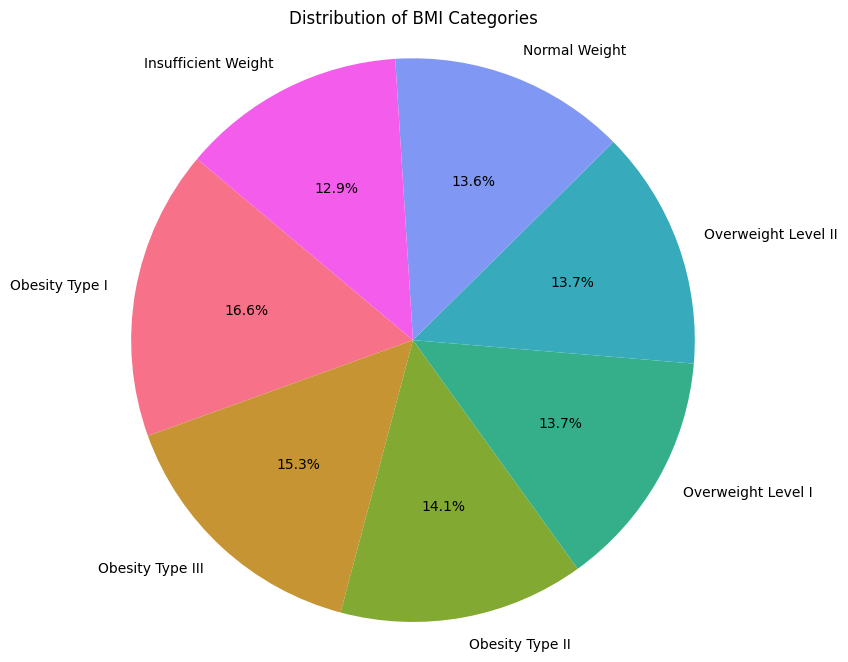

In [26]:
bmi_counts = df['Obesity'].value_counts()
colors = sns.color_palette('husl', len(bmi_counts))

plt.figure(figsize=(8, 8))
plt.pie(bmi_counts, labels=bmi_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of BMI Categories')
plt.axis('equal')  
plt.show()

DISTRIBUTION OF `GENDER WITH OBESITY`

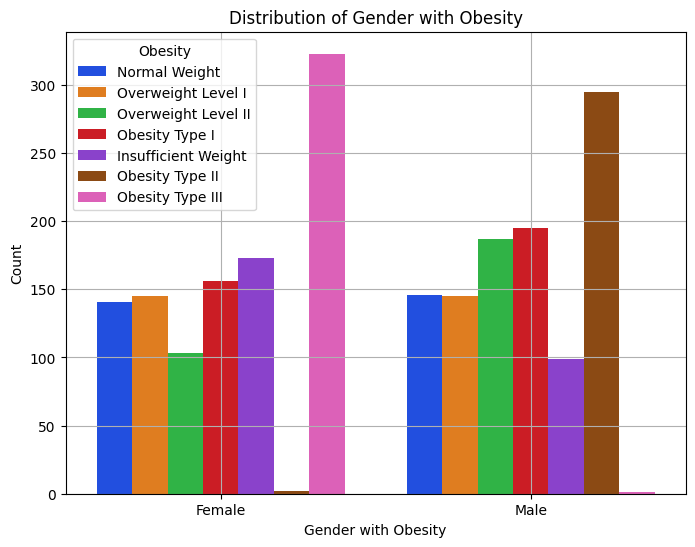

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Obesity', palette='bright')
plt.title('Distribution of Gender with Obesity')
plt.xlabel('Gender with Obesity')
plt.ylabel('Count')
plt.grid(True)
plt.show()


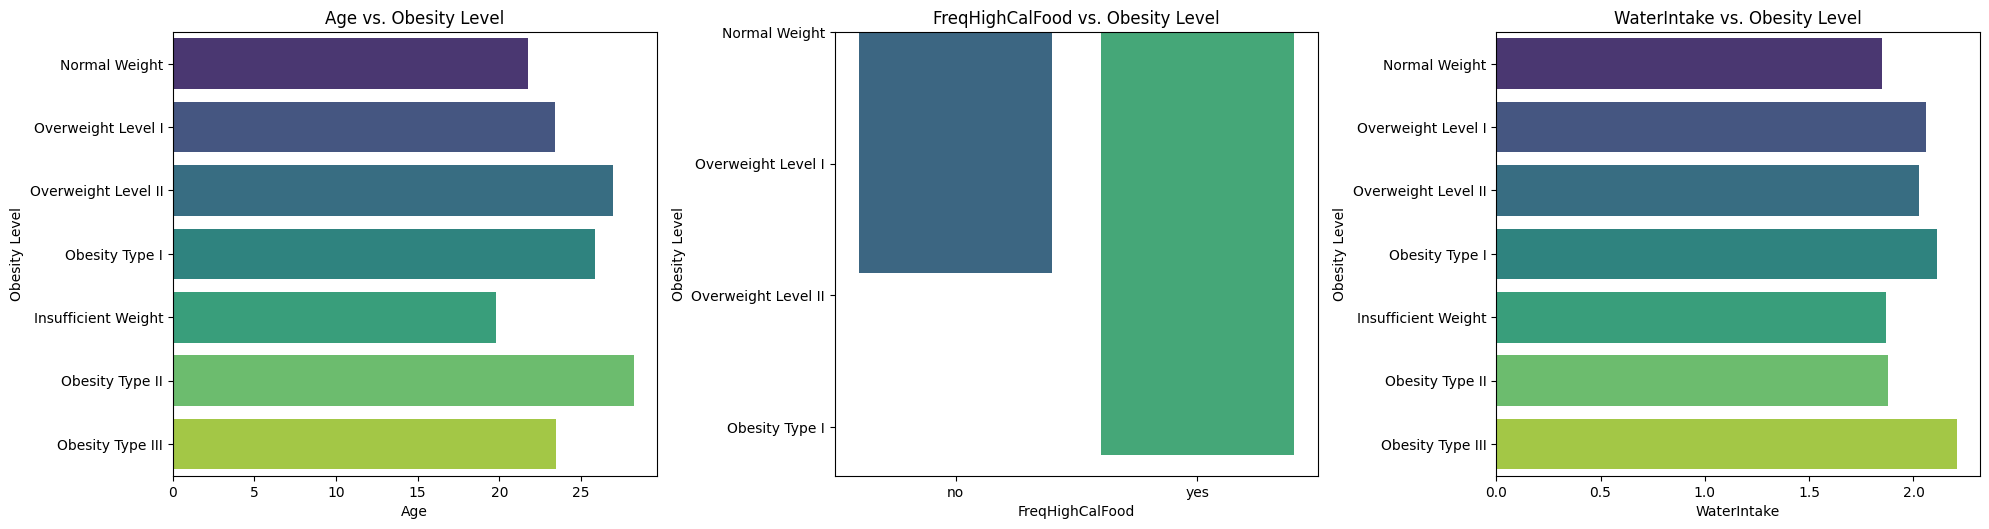

In [28]:
variables = ['Age',  'FreqHighCalFood',  'WaterIntake']

plt.figure(figsize=(20, 15))
for i, var in enumerate(variables, start=1):
    plt.subplot(3, 3, i)
    sns.barplot(x=var, y='Obesity', data=df, ci=None, palette='viridis')  
    plt.title(f'{var} vs. Obesity Level')
    plt.xlabel(var)
    plt.ylabel('Obesity Level')

plt.tight_layout()
plt.show()


`HEIGHT` VS `WEIGHT`

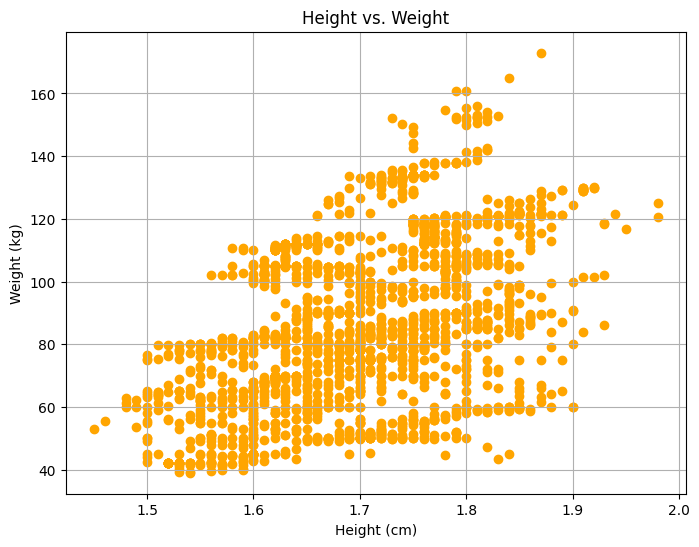

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Height'], df["Weight"], color='Orange')
plt.title('Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()

DISTRIBUTION OF `FAMILY HISTORY WITH OBESITY`

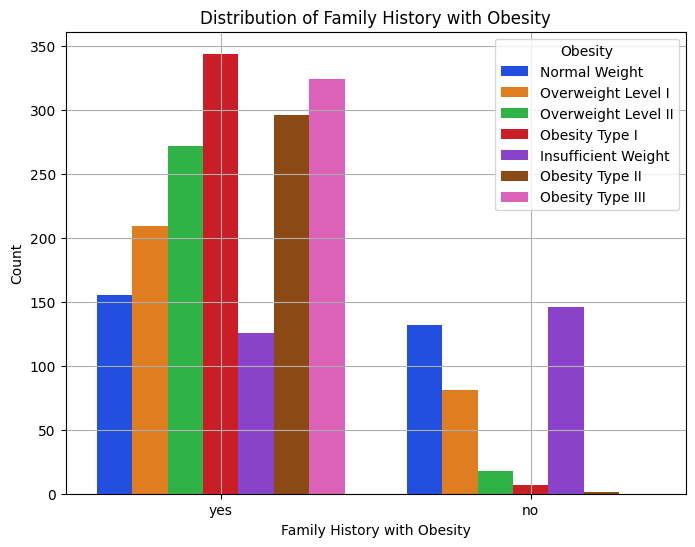

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='FamOverweightHist', hue='Obesity', palette='bright')
plt.title('Distribution of Family History with Obesity')
plt.xlabel('Family History with Obesity')
plt.ylabel('Count')
plt.grid(True)
plt.show()


`BMI` VS `HIGH CALORY FOOD CONSUMPTION`

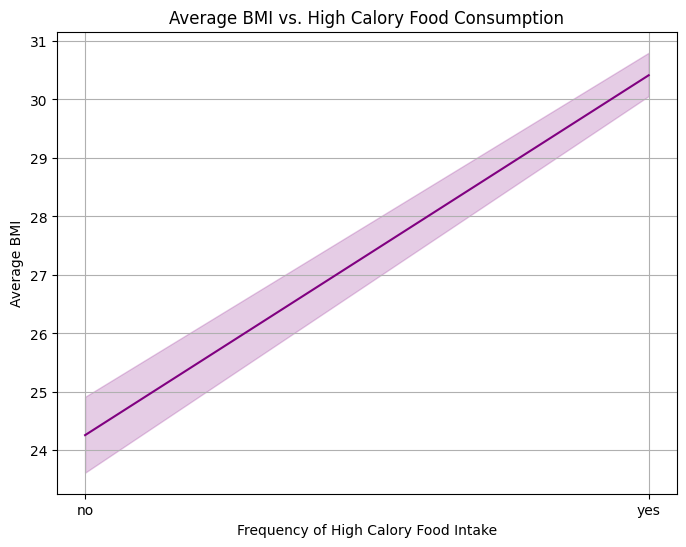

In [31]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='FreqHighCalFood', y='BMI', color='purple')
plt.title('Average BMI vs. High Calory Food Consumption')
plt.xlabel('Frequency of High Calory Food Intake')
plt.ylabel('Average BMI')
plt.grid(True)
plt.show()

`TRANSPORTATION` VS `OBESITY`

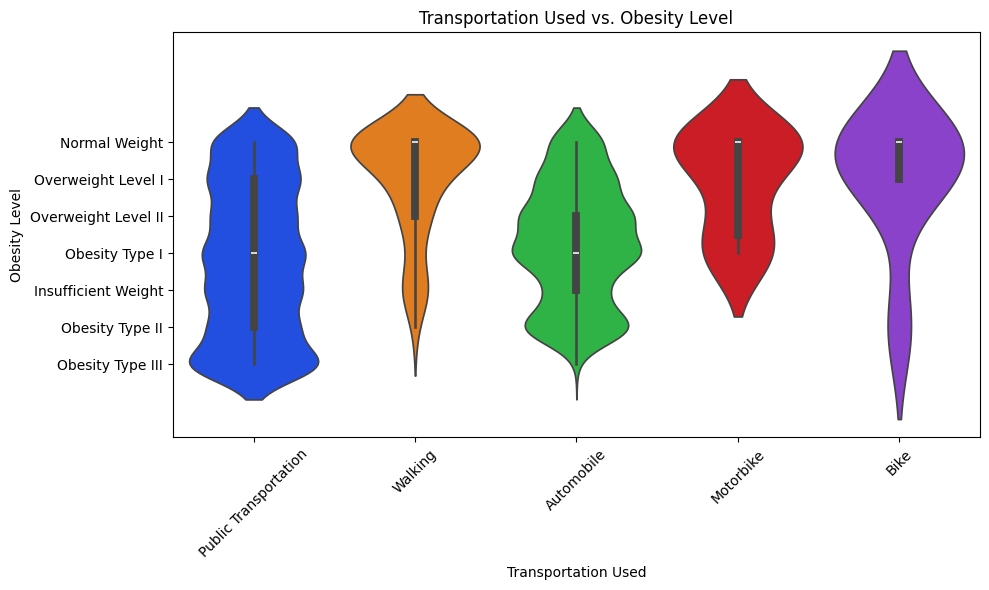

In [32]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Transport", y="Obesity", data=df, palette='bright')
plt.xlabel("Transportation Used")
plt.ylabel("Obesity Level")
plt.title("Transportation Used vs. Obesity Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`PHYSICAL ACTIVITY` VS `OBESITY`

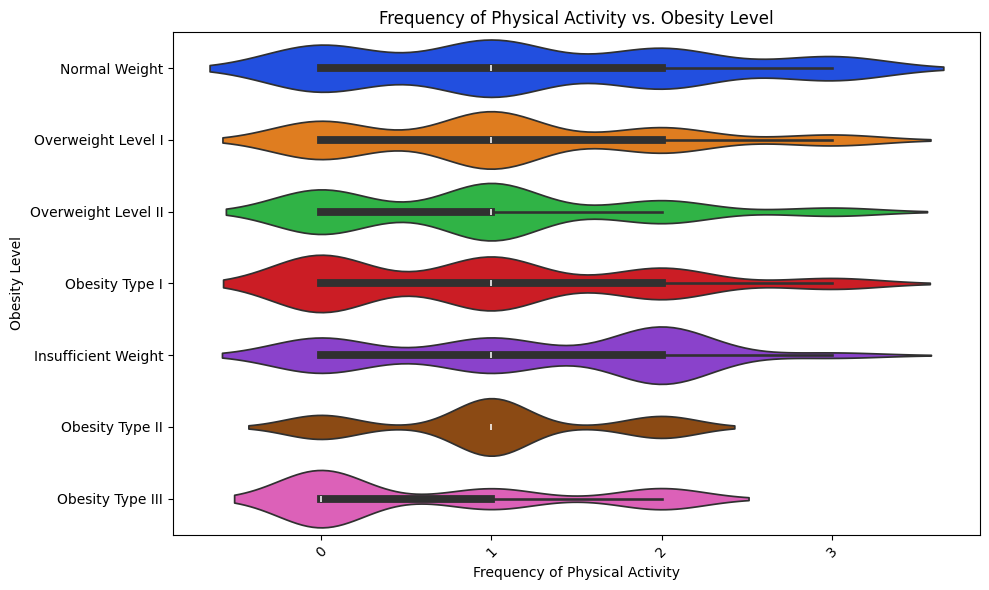

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="FreqPhyAct", y="Obesity", data=df, palette='bright')
plt.xlabel("Frequency of Physical Activity")
plt.ylabel("Obesity Level")
plt.title("Frequency of Physical Activity vs. Obesity Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`SMOKE` VS `OBESITY`

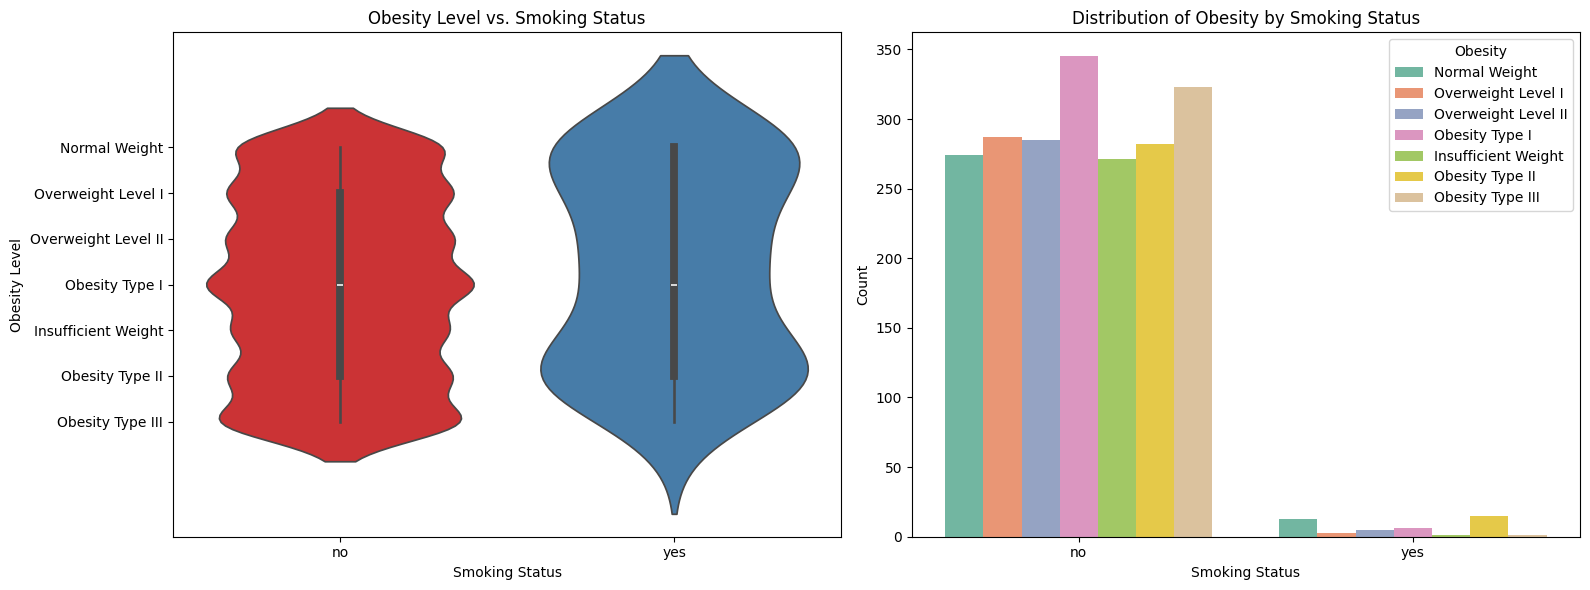

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.violinplot(x="Smoke", y="Obesity", data=df, palette="Set1", ax=axes[0])
axes[0].set_xlabel("Smoking Status")
axes[0].set_ylabel("Obesity Level")
axes[0].set_title("Obesity Level vs. Smoking Status")

sns.countplot(data=df, x='Smoke', hue='Obesity', palette='Set2', ax=axes[1])
axes[1].set_title('Distribution of Obesity by Smoking Status')
axes[1].set_xlabel('Smoking Status')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


`ALCOHOL CONSUMPTION` VS `OBESITY`

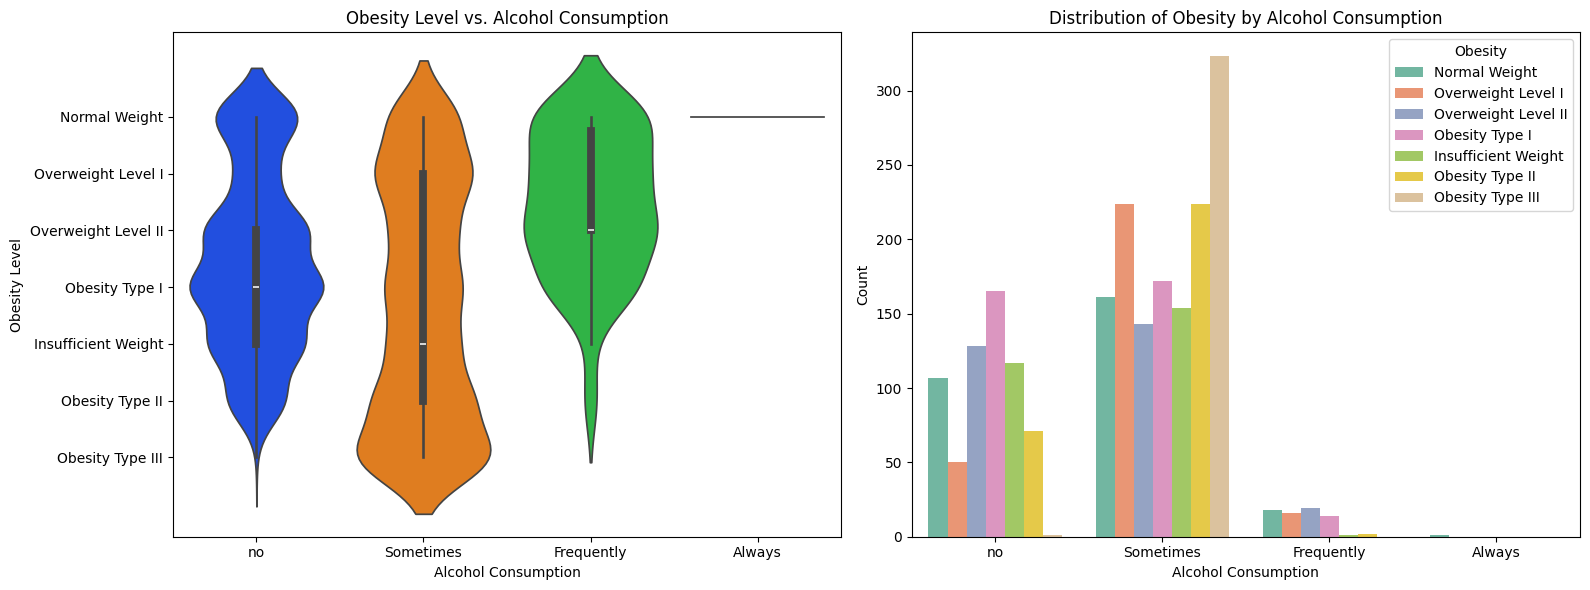

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.violinplot(x="AlcoholConsump", y="Obesity", data=df, palette='bright', ax=axes[0])
axes[0].set_xlabel("Alcohol Consumption")
axes[0].set_ylabel("Obesity Level")
axes[0].set_title("Obesity Level vs. Alcohol Consumption")

sns.countplot(data=df, x='AlcoholConsump', hue='Obesity', palette='Set2', ax=axes[1])
axes[1].set_title('Distribution of Obesity by Alcohol Consumption')
axes[1].set_xlabel('Alcohol Consumption')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# CLEANED DF

In [36]:
file_location = 'C:\\Users\\kabee\\OneDrive\\Desktop\\DS_PROJECT\\notebook\\data\\Obesity Estimation Cleaned.csv'
df.to_csv(file_location, index=False)


` | -------------------------------------------- | END |--------------------------------------------- | `